In [7]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-08-01 17:18:15--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.164.240.67, 3.164.240.34, 3.164.240.38, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.164.240.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  11.2MB/s    in 3m 46s  

2024-08-01 17:22:02 (10.8 MB/s) - ‘sam_vit_h_4b8939.pth.1’ saved [2564550879/2564550879]



In [8]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth

--2024-08-01 17:22:02--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.164.240.38, 3.164.240.67, 3.164.240.34, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.164.240.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1249524607 (1.2G) [binary/octet-stream]
Saving to: ‘sam_vit_l_0b3195.pth’

sam_vit_l_0b3195.pt 100%[===================>]   1.16G  10.2MB/s    in 1m 51s  

2024-08-01 17:23:53 (10.8 MB/s) - ‘sam_vit_l_0b3195.pth’ saved [1249524607/1249524607]



In [9]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2024-08-01 17:23:53--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.164.240.67, 3.164.240.22, 3.164.240.38, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.164.240.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M  11.2MB/s    in 33s     

2024-08-01 17:24:27 (10.8 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [17]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/torch/data/167.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [19]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [20]:
masks = mask_generator.generate(image)

In [21]:
print(len(masks))
print(masks[0].keys())

79
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


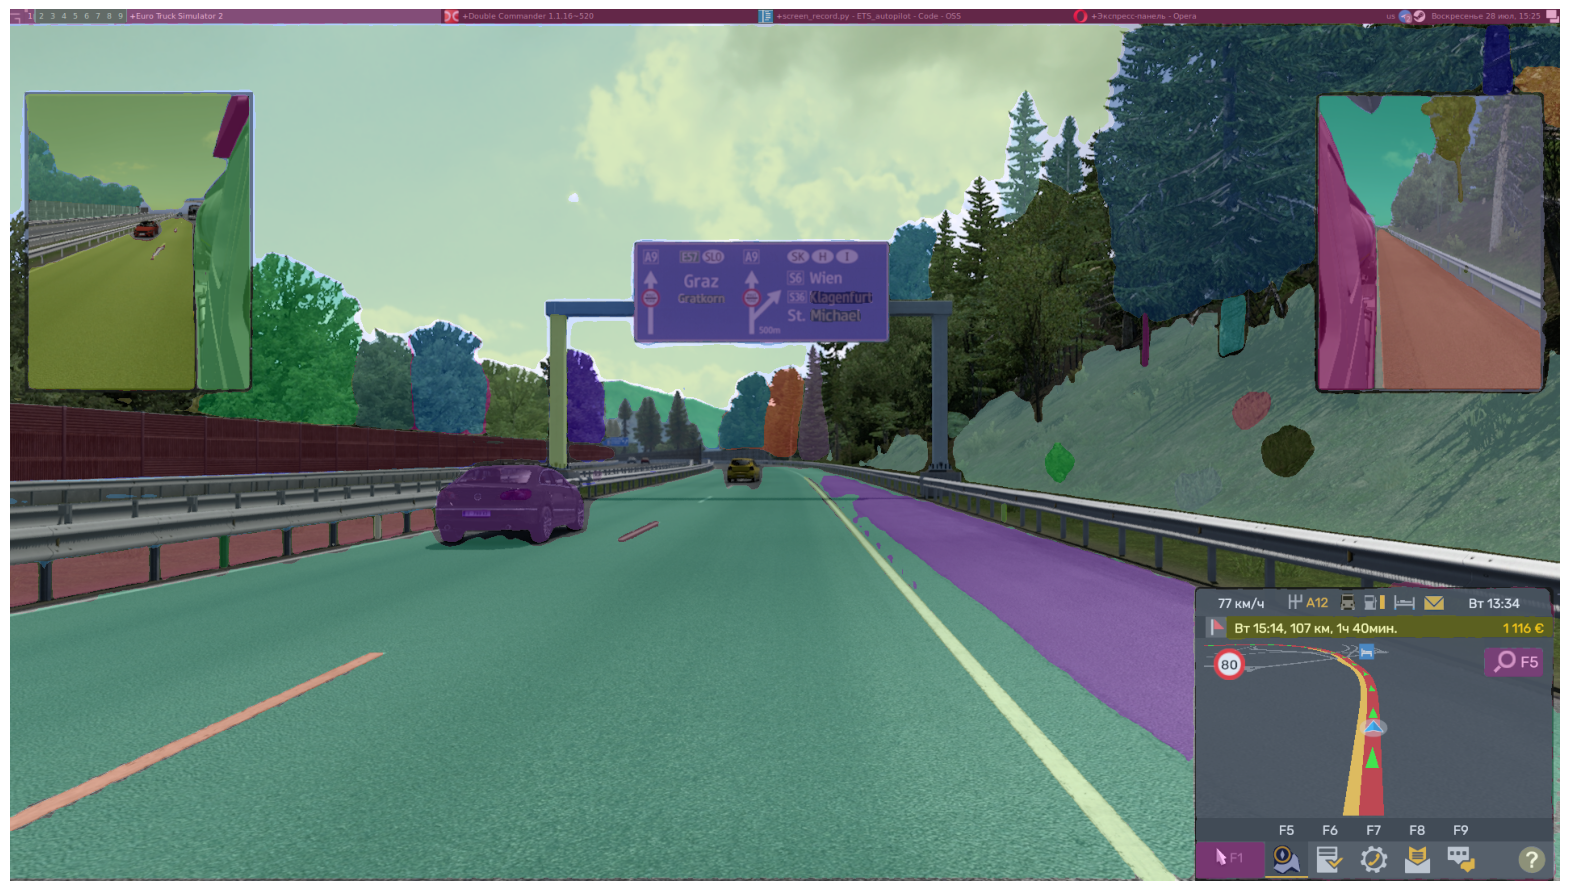

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 